In [188]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [189]:
import pandas as pd
import re

excel_file_path = '/content/drive/MyDrive/Colab Notebooks/train_Data.xlsx'
df = pd.read_excel(excel_file_path)

In [190]:
df.head()

,ID,label,content_cleaned
0,1,0,葉黃素、益生菌、魚油、蔓越莓錠。你需要的保健品️日本味王全部都有。家裡備著日本味王保健品。好...
1,2,1,海底椰是一種夏季常見的湯料以清燥熱、止咳功效顯著而聞名且具有滋陰補腎、潤肺養顏、強壯身體機能...
2,3,0,杏輝活芯升級版。健康從芯開始。一整天的會議轟炸感覺精神不濟、提不起勁只想癱在床上。趕公車、爬...
3,4,1,淨亮效果AAA擊退暗沉更快速亮澤肌防護AAA光澤AAA。你是否擁有以下肌膚問題:肌膚蠟黃暗沉...
4,5,0,醫學實證000有感排便順暢。保證投入菌數高達000億。益生菌AAA益生元AAA後生元。調整體...


In [191]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df['content_cleaned']
y = df['label']

# Split the data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,  # Increased test size to 25% of the data
    stratify=y,     # Stratify based on the 'label' column
    random_state=42 # for reproducibility
)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

print("\nDistribution of labels in y_train:")
display(y_train.value_counts())

print("\nDistribution of labels in y_test:")
display(y_test.value_counts())

Shape of X_train: (1156,)
Shape of X_test: (386,)
Shape of y_train: (1156,)
Shape of y_test: (386,)

Distribution of labels in y_train:


,count
label,
1,578
0,578



Distribution of labels in y_test:


,count
label,
0,193
1,193


In [192]:
# Install Jieba for Chinese word segmentation
!pip install jieba

In [193]:
import jieba

def segment_text(text):
    if isinstance(text, str):
        # Perform word segmentation
        seg_list = jieba.cut(text, cut_all=False) # cut_all=False for accurate mode
        return " ".join(seg_list)
    else:
        return ""

# Apply word segmentation to the cleaned content in both training and testing sets
X_train_segmented = X_train.apply(segment_text)
X_test_segmented = X_test.apply(segment_text)

print("Original X_train sample:")
display(X_train.head())

print("\nSegmented X_train sample:")
display(X_train_segmented.head())

print("\nOriginal X_test sample:")
display(X_test.head())

print("\nSegmented X_test sample:")
display(X_test_segmented.head())

Original X_train sample:


,content_cleaned
1415,行動好幫手多效動力配方鞏固AAA靈活AAA舒適。你有以下困擾嗎行動緩慢、損耗激增每天萬步不再...
1032,首支全效對抗全身體脂肪。首支活菌吸附油脂使脂肪不易形成。認證000周有效。每天000顆輕鬆對...
1042,增髮。減少脫髮。強韌髮質。提高生長速度。維護頭皮健康。生物素增強頭髮質量&生長速度。泛酸維持...
625,顧眼睛。最強雙眼守護神快攻舒緩酸澀不適。護眼產品。做完臉部除毛雷射後覺得眼睛澀澀微微畏光喝了...
71,歐洲有機食品認證AAA。A巧克力單一產區可可豆獨具風味比利時工藝製作得獎無數專家鑑賞。



Segmented X_train sample:


,content_cleaned
1415,行動 好 幫手 多 效動力 配方 鞏固 AAA 靈活 AAA 舒適 。 你 有 以下 困擾 ...
1032,首支 全效 對 抗 全身 體 脂肪 。 首支 活菌 吸附 油脂 使 脂肪 不易 形成 。 認...
1042,增 髮 。 減少 脫 髮 。 強韌 髮 質 。 提高 生長 速度 。 維護頭 皮 健康 。 ...
625,顧 眼睛 。 最強 雙眼 守護神 快攻 舒緩 酸澀 不適 。 護眼產品 。 做 完臉 部除 ...
71,歐洲 有機 食品 認證 AAA 。 A 巧克力 單一產區 可可豆 獨具 風味 比利 時工 藝...



Original X_test sample:


,content_cleaned
1059,出國前來昇恆昌買。杏輝蓉憶記補充你的黃金記憶力。長途旅行、繁忙工作、備考衝刺。每天一粒。杏輝...
307,藥品級AAA型態魚油。韓國聯合製藥品質保證。0AAA微型膠囊好吞好吸收。高純度000%。A0...
1260,情趣深夜營養師藍色小丸子黃金強硬配方透納葉南非醉茄精胺酸男性保健食品。透過精心調配的黃金強硬...
504,軟磷脂。分解脂肪。、降低膽固醇、預防動脈硬化。膳食纖維。維持皮膚與神經健康。維生素AAA與芝...
1399,安素配方新升級添加AAA三重優質蛋白質有助於修復組織幫助肌肉生長。安素000000罐維持肌肉...



Segmented X_test sample:


,content_cleaned
1059,出國前 來 昇 恆昌買 。 杏輝蓉憶 記補充 你 的 黃 金 記憶力 。 長 途 旅行 、 ...
307,藥品級 AA A型 態魚 油 。 韓國聯 合 製 藥 品 質 保 證 。 0AAA 微型 膠...
1260,情趣 深夜 營養師 藍色 小丸子 黃 金強 硬 配方 透納葉 南非 醉茄 精胺 酸 男性 保...
504,軟 磷脂 。 分解 脂肪 。 、 降低 膽 固醇 、 預防動脈 硬化 。 膳食 纖維 。 維...
1399,安素 配方 新升級 添加 AAA 三重 優質 蛋白 質 有助 於 修 復 組織 幫助 肌肉 ...


In [194]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer with min_df=2 to only include terms that appear at least twice
# and max_features to limit the number of features
vectorizer = TfidfVectorizer(min_df=2)

# Learn the vocabulary and transform the training data
X_train_bow = vectorizer.fit_transform(X_train_segmented)

# Transform the testing data using the learned vocabulary
X_test_bow = vectorizer.transform(X_test_segmented)

print("Shape of X_train_bow:", X_train_bow.shape)
print("Shape of X_test_bow:", X_test_bow.shape)

Shape of X_train_bow: (1156, 4451)
Shape of X_test_bow: (386, 4451)


In [195]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the MLP model
model = Sequential([
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01),
              loss='binary_crossentropy', # Binary crossentropy for binary classification
              metrics=['accuracy']) # Monitor accuracy

# Print the model summary
model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [196]:
# Train the model
# Convert y_train and y_test to numerical dtype
y_train_numerical = y_train.astype(int)
y_test_numerical = y_test.astype(int)

# Convert sparse matrix to dense for Keras Dense layer compatibility
X_train_bow_dense = X_train_bow.todense()


history = model.fit(X_train_bow_dense, y_train_numerical, # Use dense input for training
                    epochs=20, # Number of training epochs increased
                    shuffle=False,
                    batch_size=128, # Batch size
                    validation_split=0.3) # Use 30% of training data for validation

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.6473 - loss: 0.6816 - val_accuracy: 0.9280 - val_loss: 0.6364
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9912 - loss: 0.6020 - val_accuracy: 0.9424 - val_loss: 0.5831
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9927 - loss: 0.5376 - val_accuracy: 0.9510 - val_loss: 0.5359
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9932 - loss: 0.4819 - val_accuracy: 0.9568 - val_loss: 0.4946
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9949 - loss: 0.4337 - val_accuracy: 0.9597 - val_loss: 0.4588
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.9949 - loss: 0.3924 - val_accuracy: 0.9597 - val_loss: 0.4278
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9961 - loss: 0.3568 - val_accuracy: 0.9625 - val_loss: 0.4009
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.9961 - loss: 0.3262 - val_accuracy: 0.9625 - val_loss: 0.3777


In [197]:
# Evaluate the model on the test set
# Convert y_test to numerical dtype if it hasn't been already
y_test_numerical = y_test.astype(int)

# Convert sparse test matrix to dense for evaluation
X_test_bow_dense = X_test_bow.todense()


loss, accuracy = model.evaluate(X_test_bow_dense, y_test_numerical) # Use dense input for evaluation

print(f"\nTest Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9666 - loss: 0.2298

Test Loss: 0.2397
Test Accuracy: 0.9560


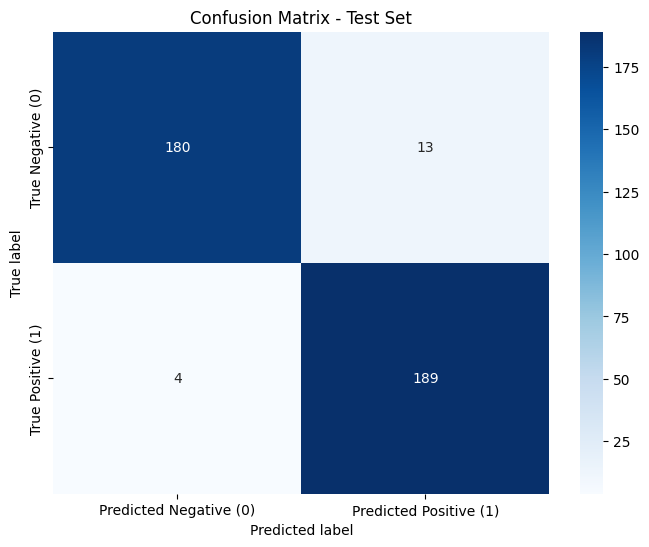

In [198]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_test_numerical, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative (0)', 'Predicted Positive (1)'],
            yticklabels=['True Negative (0)', 'True Positive (1)'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix - Test Set')
plt.show()

In [199]:
from sklearn.metrics import classification_report

# Generate a classification report
report = classification_report(y_test_numerical, y_pred)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95       193
           1       0.94      0.98      0.96       193

    accuracy                           0.96       386
   macro avg       0.96      0.96      0.96       386
weighted avg       0.96      0.96      0.96       386



In [200]:
import numpy as np
X_test_dense = X_test_bow.toarray()
y_test_numerical = y_test.astype(int).values

y_pred_prob = model.predict(X_test_dense)
y_pred = (y_pred_prob >= 0.5).astype(int).flatten()

results = pd.DataFrame({
    "text": X_test,
    "true": y_test_numerical,
    "pred": y_pred
})

tn = results[(results.true == 0) & (results.pred == 0)]
tp = results[(results.true == 1) & (results.pred == 1)]
fn = results[(results.true == 1) & (results.pred == 0)]
fp = results[(results.true == 0) & (results.pred == 1)]

examples = []
if len(tn) > 0: examples.append(("True Negative", tn.sample(1)))
if len(tp) > 0: examples.append(("True Positive", tp.sample(1)))
if len(fn) > 0: examples.append(("False Negative", fn.sample(1)))
if len(fp) > 0: examples.append(("False Positive", fp.sample(1)))

if len(examples) < 5:
    more_samples = results.sample(5 - len(examples))
    for _, row in more_samples.iterrows():
        examples.append(("Random", row.to_frame().T))

for label, row in examples:
    print(f"\n[{label}]")
    print("Text:", row["text"].values[0])
    print("True Label:", row["true"].values[0])
    print("Pred Label:", row["pred"].values[0])


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

[True Negative]
Text: 薑黃養氣茶000入富含薑黃等天然成分有助調節身體機能幫助維持消化道健康讓您每天都感到輕盈舒暢。享受一杯溫暖的薑黃養氣茶讓身心得到舒緩健康從每一口開始。
True Label: 0
Pred Label: 0

[True Positive]
Text: 輕鬆甩重。加速代謝燃脂。這麼吃真的能瘦。瘦腿。新陳代謝循環較慢者。服用後會降低食慾體重下降容易接受飲食控制從而達到體重的減輕。
True Label: 1
Pred Label: 1

[False Negative]
Text: 誘人AAA型、豐潤飽滿、啟動豐盈能量關鍵、A彈無限放大、自然波波實力、圓挺、勾勒魅力弧度、平易近人、被叫小兄弟、性感絕緣體、一馬平川、再一次成長蛻變、豐挺撩人、懸吊支撐、A彈圓潤、完美AAA型弧度、彈、滿、圓。
True Label: 1
Pred Label: 0

[False Positive]
Text: 讓好樂活視倍佳全方位護眸救星組成為你眼睛的最佳守護者這款產品結合了最先進的科技和天然成分有效預防、改善和減輕眼睛疲勞和不適。不僅如此它還能幫助降低導致眼睛問題的風險因子讓你擁有明亮健康的雙眼。無論是長時間使用電腦、手機或是環境污染對眼睛造成的傷害好樂活視倍佳全方位護眸救星組都能有效保護你的視力。讓你每天都能享受清晰明亮的視界從此告別眼睛問題的困擾。
True Label: 0
Pred Label: 1

[Random]
Text: 氧氣是促進幹細胞的生長。在急性心肌梗塞的病人當中需要發展出來一個有別於一般外科系統處理的治療方式最新的方法是利用幹細胞的培養來治療心肌梗塞幫助受損的心肌梗塞缺損缺血的細胞。恢復它的功能。而氧氣在培養這些幹細胞的過程當中扮演著調節及修護功能的重要角色。慢性缺氧。不可忽視的老化及健康殺手。0老化及百病之源自由基000缺氧導致老化000缺氧會使免疫系統失調。0缺氧導致毒素無法排出。0缺氧視為是所有疾病的單一最大原因。0缺氧是免疫和退化性疾病的一個顯著因數。0好的補氧概念使抗衰抗老是輕而易舉的事。0缺氧使體內各細胞將無法正常運作身體的機能和代謝狀態也會開始病變。0抗老及健康的新定義是內在有足夠的氧氣。
True Label: 1
P